#### 从“维度”说起
- 对于数组和Series，维度就是功能shape返回的结果，shape返回几个数字，就是几维。比如说没有行列之分的就是一维，有行列之分的就是二维，也称之为表

- 在数组的每张表之中，都有一个特征矩阵或者一个DataFrame，其中行是样本，劣势特征，这个时候的维度指的是样本的数量或者特征的数量，基本上指的是特征的数量，一个特征就是一维，2个特征就是二维，n个特征就是n维，算法的降维一般指的是降低特征的数量，就是这个地方的维度

- 图像的维度，1维就是向量，2维是直角坐标系，3维是立体直角坐标系

我们知道Sklearn中导入特征矩阵必须是至少2维的，指的是第一种，经常要用到.values.reshape(-1,1)的方法，而随机森林收的随机抽取特征来建树避免高纬度计算，指的是第二种的维度，

> PCA使用的是信息量衡量指标，就是样本差，又称可解释性方差，方差越大，特征多带的信息也就越多

- 找出n个向量。让数据能够压缩到少数特征上并且总信息量不损失太多的技术就是矩阵分解 PCA和ＳＶＤ都是遵从这个过程来实现降维的，ＰＣＡ使用方差作为信息量的衡量指标，ＳＶＤ使用的是奇异值分解来找出空间

- PCA和SVD都需要遍历所有的特征和样本来计算信息量指标。并且在矩阵分解过程中会产生比原来的矩阵更大的矩阵，所以需要很多的计算，由于计算量大，运行比较缓慢，但是由于其特殊的能力，依旧是宠儿

In [1]:
# 高维度的数据可视化
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
y = iris.target
x =iris.data
x.shape

(150, 4)

In [2]:
# 建模调用PCA
pca = PCA(n_components = 2) # 实例化
pca = pca.fit(x)
x_dr = pca.transform(x)
x_dr

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [3]:
# 可视化
# 将三中鸢尾花的数据利用来两个特征向量来绘制到直角坐标系上面
colors = ['red','black','orange']
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

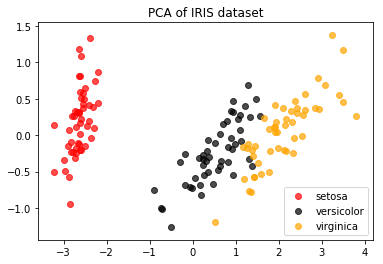

In [4]:
plt.figure()
for i in [0,1,2]:
    plt.scatter(x_dr[y == i,0],
               x_dr[y == i,1],
               alpha = 0.7,
                c = colors[i],
                label =iris.target_names[i]
               )
plt.legend()
plt.title("PCA of IRIS dataset")
plt.show()

In [5]:
# 探索降维后的数据
# explained_variance_ 查看降维后的每个新特征向量哈桑所带的信息量大小
pca.explained_variance_

array([4.22824171, 0.24267075])

In [6]:
# explain_variance_ratio_ 查看降维后每个新特征向量所占的信息量占原始数据总得比率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [7]:
pca.explained_variance_ratio_.sum()

0.9776852063187949

### 选取超参数
- 最大似然估计自选超参数
- 按信息量占比选超参数

In [8]:
# 最大似然估计自选超参数
pca_mle = PCA(n_components = "mle")
x_mle = pca_mle.fit_transform(x)
x_mle

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [9]:
pca_mle.explained_variance_ratio_.sum()

0.9947878161267246

In [11]:
# 按信息量占比选超参数，在svd_solver ='full',n_components输入[0,1] 表示保存多少的信息量

pca_f = PCA(n_components = 0.97,svd_solver = 'full')
pca_f = pca_f.fit(x)
x_f = pca_f.transform(x)
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])